In [601]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from datetime import datetime
from datetime import timedelta

import time
from os import listdir
from os.path import isfile, join
import re

plt.rcParams.update(plt.rcParamsDefault)

In [496]:
!pip freeze > requirements.txt

You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Non-Pharmaceutical Interventions in Canada

Here we show comparisons of descriptive statistics for each regional and subregional-level dataset across Canada. Download individual region CSVs from the Google Sheet and place them in `./data/`. 

Stats Canada data on population size by province available from: 

Statistics Canada. Table 17-10-0009-01 Population estimates, quarterly"
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901
DOI: https://doi.org/10.25318/1710000901-eng


In [564]:
cutoff_date = datetime(2020, 5, 18)

In [498]:
stats_columns=[
    'file',
    'region',
    'subregion', 
    'rows',
    'columns',
    'start_date.min', 
    'start_date.max', 
    'end_date.min', 
    'end_date.max', 
    'end_date.count / count', 
    'reviewer.unique', 
    'intervention_summary.unique', 
    'intervention_category.unique',
    'target_population_category.unique',
    'target_population_category (% not "General")',
    'enforcement_category.unique',
    'oxford_government_response_category.notna',
    'oxford_government_response_category.unique',
    'oxford_fiscal_measure_cad.sum',
    'source_url.unique'
]

columns=[
    'start_date',
    'end_date',
    'reviewer',
    'country',
    'region',
    'subregion',
    'intervention_summary',
    'intervention_category',
    'target_population_category',
    'enforcement_category',
    'oxford_government_response_category',
    'oxford_closure_code',
    'oxford_public_info_code',
    'oxford_travel_code',
    'oxford_geographic_target_code',
    'oxford_fiscal_measure_cad',
    'oxford_monetary_measure',
    'oxford_testing_code',
    'oxford_tracing_code',
    'oxford_restriction_code',
    'oxford_income_amount',
    'oxford_income_target',
    'oxford_debt_relief_code',
    'source_url',
    'source_organization',
    'source_organization_2',
    'source_category',
    'source_title',
    'source_full_text',
    'note',
    'end_source_url',
    'end_source_organization',
    'end_source_organization_2',
    'end_source_category',
    'end_source_title',
    'end_source_full_text'
]

In [499]:
population_df = pd.read_csv('data/statscan-population-q.csv', thousands=',')
population_df[['Geography', 'Q1 2020']]
population_df['region'] = population_df['Geography']
population_df['population_q1_2020'] = pd.to_numeric(population_df['Q1 2020'])
population_df = population_df[['region', 'population_q1_2020']]
population_df

,region,population_q1_2020
0,Canada,37894799
1,Newfoundland and Labrador,521365
2,Prince Edward Island,158158
3,Nova Scotia,977457
4,New Brunswick,779993
5,Quebec,8537674
6,Ontario,14711827
7,Manitoba,1377517
8,Saskatchewan,1181666
9,Alberta,4413146


In [565]:
full_df = pd.read_csv('SCHEMA UPDATE - Collecting NPIs Effects - FULL.csv', error_bad_lines=False)
full_df['start_date'] = pd.to_datetime(full_df['start_date'], format='%m/%d/%Y', errors='coerce')
full_df['end_date'] = pd.to_datetime(full_df['end_date'], format='%m/%d/%Y', errors='coerce')
full_df['oxford_fiscal_measure_cad'] = full_df['oxford_fiscal_measure_cad'].replace('[\$,]', '', regex=True).astype(float)



In [566]:
full_df = full_df[full_df['start_date'] <= cutoff_date]
full_df = full_df[~full_df['start_date'].isna()]

provinces_df = full_df[full_df['subregion'].isna() & full_df['region'].notna() & (full_df['region'] != "All")]

federal_df = full_df[full_df['subregion'].isna() & (full_df['region'].isna() | (full_df['region'] == "All"))]

In [567]:
full_df.shape

(3125, 35)

In [568]:
provinces_df.shape

(1622, 35)

In [569]:
federal_df.shape

(109, 35)

In [570]:
full_df.drop(columns=['reviewer']).to_csv('npi_canada.csv')
provinces_df.drop(columns=['reviewer']).to_csv('npi_by_province.csv')
federal_df.drop(columns=['reviewer']).to_csv('npi_federal.csv')

# Descriptive Statistics for Paper

In [571]:
print("Number of interventions recorded: ", full_df.shape[0])

Number of interventions recorded:  3125


In [572]:
print("Number of oxford interventions recorded: ", full_df['oxford_government_response_category'].count())

Number of oxford interventions recorded:  1521


In [573]:
#n = full_df[full_df['oxford_government_response_category'].isin(['S8 Fiscal measures', 'S9 Monetary measures (interest rate)', 'S10 Emergency investment in health care', 'S11 Investment in vaccines', 'S12 Testing policy', 'S13 Contact tracing'])]['oxford_government_response_category'].count()
#print("Number of oxford interventions in Stringency Index recorded (S1-S7): ", n)

In [574]:
#n / full_df.shape[0]

In [575]:
print("Number of unique source urls: ", len(full_df['source_url'].unique()))

Number of unique source urls:  1884


In [576]:
print("Number of unique primary source organizations: ", len(full_df['source_organization'].unique()))

Number of unique primary source organizations:  256


In [577]:
oxford_ratio = full_df['oxford_government_response_category'].count() / full_df['intervention_category'].count()
print("% of interventions with oxford classifications: ", oxford_ratio)



% of interventions with oxford classifications:  0.48687580025608196


In [578]:
full_df['oxford_government_response_category'].value_counts().sort_index()

C1 School Closing                           56 
C2 Workplace Closures                       239
C3 Cancel public events                     169
C4 Public Gathering Restrictions            5  
C5 Close public transport                   7  
C6 Stay at Home                             1  
C7 Restrictions on internal movements       180
C8 International Travel Controls            56 
E1 Income Support                           11 
E2 Debt / Contract Relief for Households    6  
E3 Fiscal measures                          292
E4 Support for Other Countries              2  
H1 Public Info Campaigns                    356
H2 Testing policy                           46 
H3 Contact tracing                          6  
H4 Emergency investment in health care      78 
H5 Investment in vaccines                   11 
Name: oxford_government_response_category, dtype: int64

In [579]:
assert full_df['oxford_government_response_category'].nunique() == 17

In [580]:
print("Number of regions: ", full_df['country'].nunique())
print("Number of regions: ", full_df['region'].nunique())
print("Number of subregions: ", full_df['subregion'].nunique())

#assert full_df['country'].nunique() == 1 # canada
assert full_df['region'].nunique() == 15 # 13 provinces + nan + All
assert full_df['subregion'].nunique() == 21

Number of regions:  2
Number of regions:  15
Number of subregions:  23


AssertionError: 

# NPIs before Key Dates

In [516]:
full_11_df = full_df[full_df['start_date'] < '2020-03-11']
print("Number of interventions recorded before may 11: ", full_11_df.shape[0])
print("Number of interventions recorded before may 11 (%): ", full_11_df.shape[0] / full_df.shape[0])


Number of interventions recorded before may 11:  137
Number of interventions recorded before may 11 (%):  0.04417929700096743


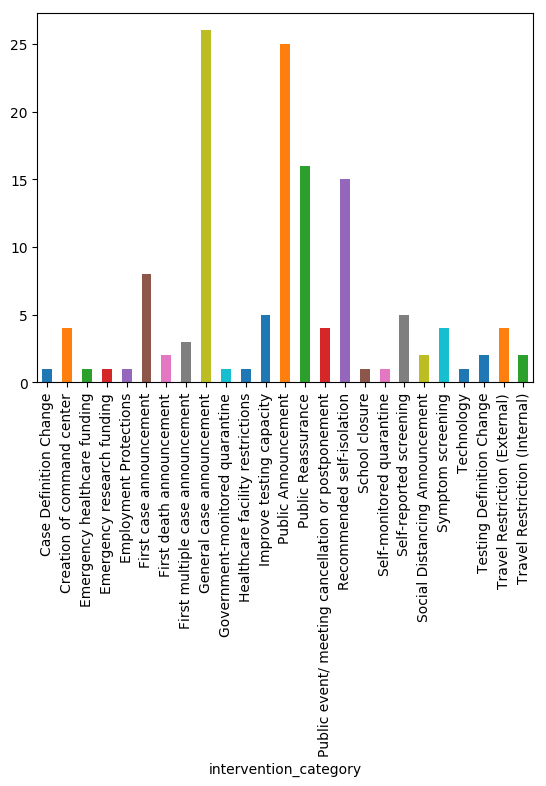

In [517]:
full_11_df.groupby(by='intervention_category')['start_date'].count().plot.bar()

In [518]:
full_1_df = full_df[full_df['start_date'] < '2020-01-25'] # first case
print("Number of interventions recorded before Jan 25: ", full_1_df.shape[0])
print("Number of interventions recorded before Jan 25 (%): ", full_1_df.shape[0] / full_df.shape[0])


Number of interventions recorded before Jan 25:  9
Number of interventions recorded before Jan 25 (%):  0.0029022895840051595


In [519]:
9 / full_df.shape[0]

0.0029022895840051595

In [520]:
full_1_df['intervention_category'].unique()

array(['Public Announcement', 'Public Reassurance',
       'Self-reported screening', 'Symptom screening',
       'Improve testing capacity'], dtype=object)

## NPI: Enforcement Categories


In [521]:
len(full_df['enforcement_category'].unique())

6

In [522]:
full_df.groupby(by='enforcement_category').count().max(axis=1).sort_values()

enforcement_category
Arrest              8   
Legal Action        41  
Fines               97  
Refusal of Entry    175 
Not Applicable      2694
dtype: int64

Text(0.5,0,'count')

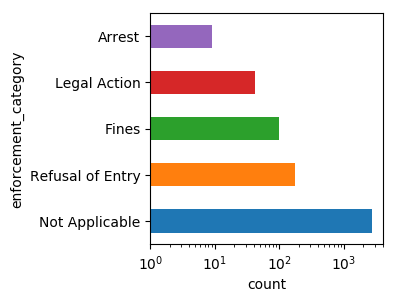

In [523]:
full_df.groupby(by="enforcement_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(3,3))
plt.xlabel('count')

## Target Population Categories

In [524]:
len(full_df['target_population_category'].unique())

18

Text(0.5,0,'count')

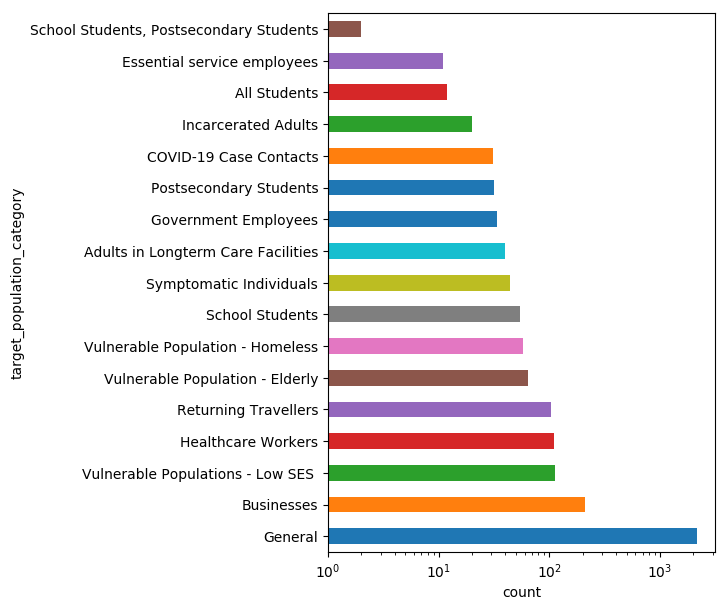

In [525]:
full_df.groupby(by="target_population_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(5,7))
plt.xlabel('count')

## NPI: Intervention Categories

In [582]:
n_interventions_unique = len(full_df['intervention_category'].unique())
assert n_interventions_unique == 62
print('Unique interventions: ', n_interventions_unique)

Unique interventions:  62


Lets show examples of the top 15 interventions by count

In [583]:
intervention_counts = pd.DataFrame(full_df.groupby(by='intervention_category').count().max(axis=1))

In [584]:
pd.set_option('display.max_colwidth', -1)

examples = pd.DataFrame(full_df.groupby(by='intervention_category').apply(lambda x: x.sample(1, random_state=3)['intervention_summary'].values[0]))

intervention_counts.merge(examples, left_index=True, right_index=True).sort_values(by='0_x', ascending=False)[0:17]



,0_x,0_y
intervention_category,,
Public Announcement,440,Announcement of delay of pick up of West sector's construction residues- pick up currently behind schedule
General case announcement,340,Six new deaths in Kitchener-Waterloo
Emergency economic funding,220,Tax and other deferrals for people and businesses
Social Distancing Announcement,172,Update on importance of physical distancing enforcement
Emergency social services funding,155,Free rides by Waterloo Taxi for seniors/disabled
Public event/ meeting cancellation or postponement,101,"All March Break programming, camps and drop-in activities are cancelled"
Administrative flexibility,101,Provincial government gives additional government officials authority to enforce COVID related orders
Recreational / Entertainment Facility Closure,94,Closure of all casinos
Healthcare facility restrictions,78,Visitors at long-term care facilities limited to family of residents at end of life or in palliative care


In [585]:
full_df[full_df['oxford_government_response_category'].isna()].groupby(by='intervention_category').count().max(axis=1).sort_values(ascending=False)


intervention_category
Public Announcement                                   303
General case announcement                             259
Administrative flexibility                            77 
Social Distancing Announcement                        74 
Emergency social services funding                     61 
Healthcare facility restrictions                      57 
Declaration of emergency (or similar)                 57 
Public Reassurance                                    44 
Health workforce task-shifting                        40 
Recreational / Entertainment Facility Closure         37 
Public park closure                                   35 
Emergency economic funding                            34 
Improve testing capacity                              33 
Recommended self-isolation                            31 
Social Service provider restrictions                  29 
Increased sanitation measures                         29 
Employment Protections                            

Text(0.5,0,'count')

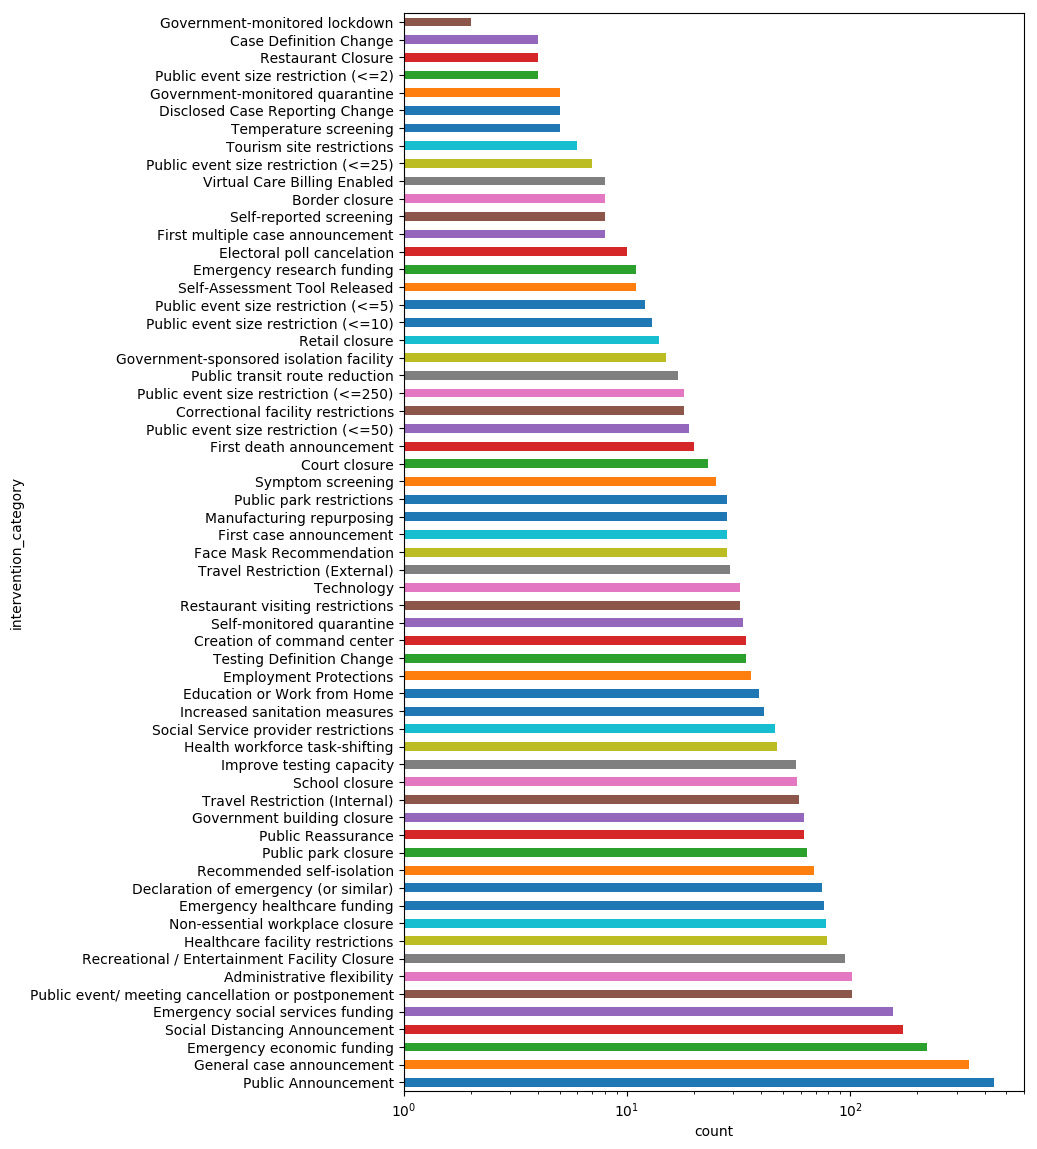

In [586]:

full_df.groupby(by="intervention_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(8,14))
plt.xlabel('count')


# Sources

Looking at unique source urls, organizations, and source types

In [587]:
a = full_df['source_organization'].unique()
a.shape

(256,)

In [588]:
b = full_df['source_organization_2'].unique()

In [589]:
all_sources = list(set(a) | set(b))
len(all_sources)

365

## NPI: Fiscal Measures

Show investments by province or subregion

In [534]:
#fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='05-20-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')
provinces_fiscal = pd.DataFrame(dates)

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['cumulative'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    all_dates_df.set_index('start_date')
    all_dates_df = all_dates_df.groupby(by='start_date').sum()

    provinces_fiscal[g_name] = all_dates_df['cumulative']

#plt.yscale('log')
#plt.title('')
#plt.ylabel('Fiscal Interventions ($)')
#plt.xlabel('Date')

#provinces_fiscal

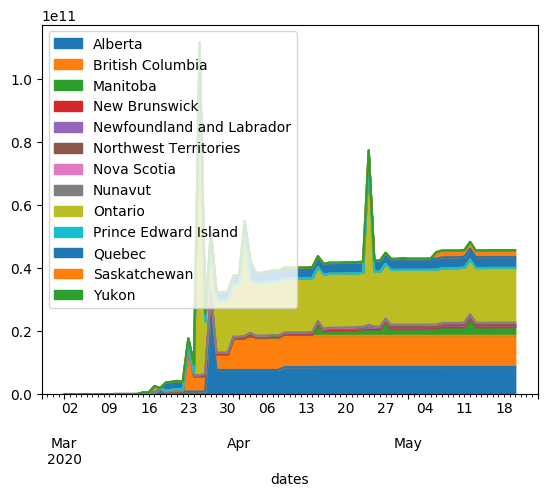

In [535]:
print("WARNING: Not Correct Yet")
provinces_fiscal.drop(['dates'], axis=1).plot.area()

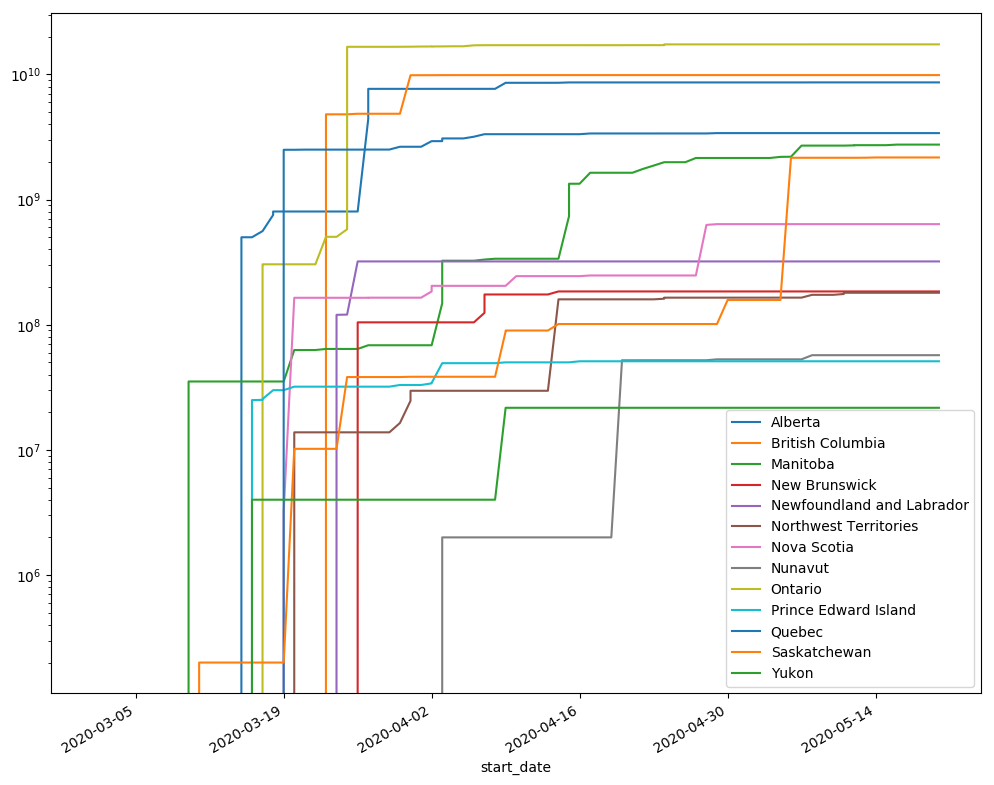

In [536]:
fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='05-20-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['oxford_fiscal_measure_cad_cumsum'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    #print(all_dates_df)
    all_dates_df.plot(x='start_date', y='oxford_fiscal_measure_cad_cumsum', label=g_name, ax=ax)

plt.yscale('log')

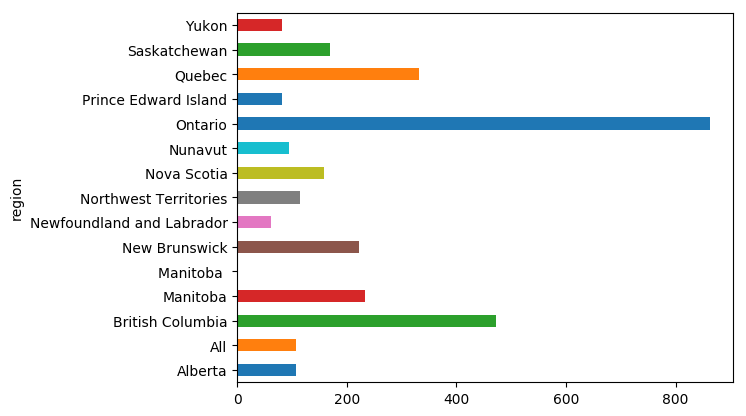

In [537]:
full_df.groupby(by=['region']).count().max(axis=1).plot.barh()

In [538]:
full_df.groupby(by=['region'])['start_date'].quantile(0.5).sort_values()

region
British Columbia            2020-03-23 00:00:00
Newfoundland and Labrador   2020-03-23 00:00:00
Saskatchewan                2020-03-23 12:00:00
Nunavut                     2020-03-25 00:00:00
Prince Edward Island        2020-03-25 00:00:00
Quebec                      2020-03-26 00:00:00
Nova Scotia                 2020-03-27 00:00:00
Alberta                     2020-03-30 00:00:00
Ontario                     2020-03-30 00:00:00
Northwest Territories       2020-03-31 00:00:00
Yukon                       2020-04-03 00:00:00
New Brunswick               2020-04-06 00:00:00
Manitoba                    2020-04-12 00:00:00
All                         2020-04-13 00:00:00
Manitoba                    2020-04-30 00:00:00
Name: start_date, dtype: datetime64[ns]

# Temporal Distribution of Events

In [590]:
full_df['start_date'].quantile(0.5)

Timestamp('2020-03-29 00:00:00')

In [591]:
provinces_df['start_date'].quantile(0.5)

Timestamp('2020-03-30 00:00:00')

In [592]:
full_df['start_date'].quantile(0.5)

Timestamp('2020-03-29 00:00:00')

In [593]:
earliest_dates = provinces_df.groupby(by='region')['start_date'].min()
earliest_dates

region
Alberta                     2020-03-05
British Columbia            2020-01-20
Manitoba                    2020-01-28
New Brunswick               2020-03-01
Newfoundland and Labrador   2020-03-06
Northwest Territories       2020-03-10
Nova Scotia                 2020-02-28
Nunavut                     2020-01-07
Ontario                     2020-01-22
Prince Edward Island        2020-02-28
Quebec                      2020-03-11
Saskatchewan                2020-02-13
Yukon                       2020-03-07
Name: start_date, dtype: datetime64[ns]

In [594]:
assert earliest_dates.min() > datetime(2020, 1, 1)

In [595]:
latest_dates = provinces_df.groupby(by='region')['start_date'].max()
latest_dates

region
Alberta                     2020-05-08
British Columbia            2020-05-15
Manitoba                    2020-05-18
New Brunswick               2020-05-18
Newfoundland and Labrador   2020-04-15
Northwest Territories       2020-05-15
Nova Scotia                 2020-05-12
Nunavut                     2020-05-14
Ontario                     2020-05-14
Prince Edward Island        2020-04-18
Quebec                      2020-05-15
Saskatchewan                2020-05-14
Yukon                       2020-05-01
Name: start_date, dtype: datetime64[ns]

In [596]:
assert latest_dates.min() <= cutoff_date

In [603]:
latest_dates[latest_dates < cutoff_date - timedelta(14)]

region
Newfoundland and Labrador   2020-04-15
Prince Edward Island        2020-04-18
Yukon                       2020-05-01
Name: start_date, dtype: datetime64[ns]

In [597]:
cma_earliest_dates = full_df.dropna(subset=['subregion']).groupby(by='subregion')['start_date'].min()
cma_earliest_dates

subregion
All except Greater Montreal   2020-05-04
Calgary                       2020-03-10
Edmonton                      2020-03-14
Gatineau                      2020-03-13
Greater Montreal              2020-05-14
Halifax                       2020-03-16
Hamilton                      2020-03-11
Kelowna                       2020-03-07
Kitchener-Waterloo            2020-03-05
London                        2020-03-12
Montreal                      2020-02-28
Niagara                       2020-03-13
Oshawa                        2020-03-13
Ottawa                        2020-03-11
Quebec City                   2020-03-13
Regina                        2020-03-16
Saskatoon                     2020-03-12
St. John's                    2020-03-13
Toronto                       2020-01-07
Vancouver                     2020-03-09
Victoria                      2020-03-11
Windsor                       2020-02-28
Winnipeg                      2020-03-12
Name: start_date, dtype: datetime64[ns]

In [598]:
assert cma_earliest_dates.min() > datetime(2020, 1, 1)

In [599]:
cma_latest_dates = full_df.dropna(subset=['subregion']).groupby(by='subregion')['start_date'].max()
cma_latest_dates

subregion
All except Greater Montreal   2020-05-04
Calgary                       2020-04-24
Edmonton                      2020-04-20
Gatineau                      2020-04-30
Greater Montreal              2020-05-14
Halifax                       2020-04-15
Hamilton                      2020-05-17
Kelowna                       2020-05-11
Kitchener-Waterloo            2020-05-04
London                        2020-05-16
Montreal                      2020-05-18
Niagara                       2020-04-16
Oshawa                        2020-05-06
Ottawa                        2020-05-15
Quebec City                   2020-04-15
Regina                        2020-05-14
Saskatoon                     2020-05-01
St. John's                    2020-04-20
Toronto                       2020-05-18
Vancouver                     2020-04-23
Victoria                      2020-05-01
Windsor                       2020-05-03
Winnipeg                      2020-05-15
Name: start_date, dtype: datetime64[ns]

In [600]:
assert cma_latest_dates.min() <= cutoff_date

In [602]:
cma_latest_dates[cma_latest_dates < cutoff_date - timedelta(14)]

subregion
Calgary       2020-04-24
Edmonton      2020-04-20
Gatineau      2020-04-30
Halifax       2020-04-15
Niagara       2020-04-16
Quebec City   2020-04-15
Saskatoon     2020-05-01
St. John's    2020-04-20
Vancouver     2020-04-23
Victoria      2020-05-01
Windsor       2020-05-03
Name: start_date, dtype: datetime64[ns]

DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')


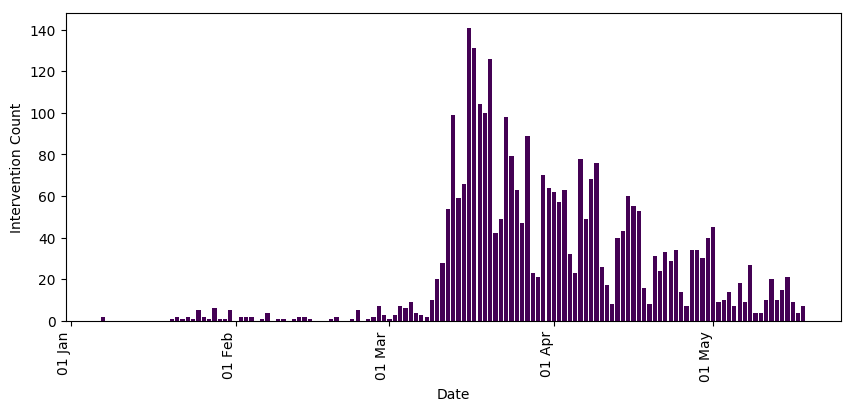

In [550]:
import matplotlib.dates as mdates
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10,4))

xticks = pd.date_range(start='12-01-2019', end='03-31-2020', freq='M')
#subset = full_df[full_df['start_date'] < pd.to_datetime('04-01-2020')]
ts = full_df.groupby(by=['start_date'])['intervention_category'].count()

cmap = mpl.cm.get_cmap('viridis')
plt.bar(ts.index, ts.values, color=cmap(0))

plt.xlabel('Date')
plt.ylabel('Intervention Count')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
month_format = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(month_format)
plt.xticks(rotation=90, ha='right')

print(xticks)

DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30'],
              dtype='datetime64[ns]', freq='M')


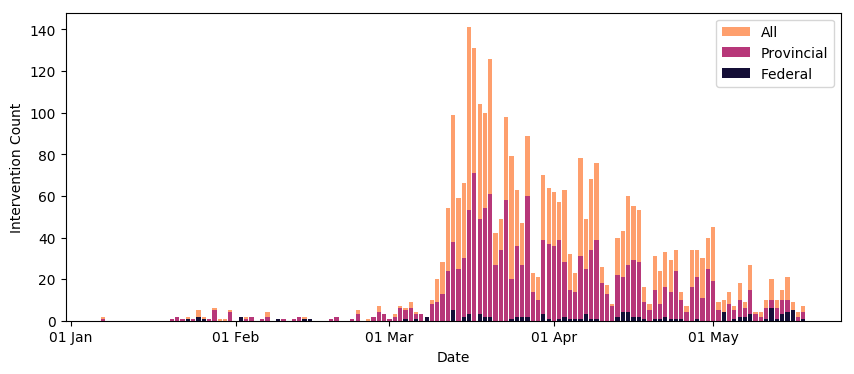

In [551]:
import matplotlib.dates as mdates
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 4))

xticks = pd.date_range(start='12-01-2019', end='05-17-2020', freq='M')
#subset = full_df[full_df['start_date'] < pd.to_datetime('04-01-2020')]


cmap = mpl.cm.get_cmap('magma')


ts = full_df.groupby(by=['start_date'])['intervention_category'].count()
plt.bar(ts.index, ts.values, color=cmap(0.8), label='All')

ts = provinces_df.groupby(by=['start_date'])['intervention_category'].count()
plt.bar(ts.index, ts.values, color=cmap(0.5), label='Provincial')

ts = federal_df.groupby(by=['start_date'])['intervention_category'].count()
plt.bar(ts.index, ts.values, color=cmap(0.1), label='Federal')



plt.xlabel('Date')
plt.ylabel('Intervention Count')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
month_format = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(month_format)
print(xticks)
plt.legend()

#ts = full_df.subtract(provinces_df).groupby(by=['start_date'])['intervention_category'].count()
#cmap = mpl.cm.get_cmap('viridis')
#plt.bar(ts.index, ts.values, color=cmap(.5), alpha=0.4)
plt.savefig('doc/img/fig2.png', dpi=300)

# Geographical Distribution of Interventions

In [552]:
names = full_df['region']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

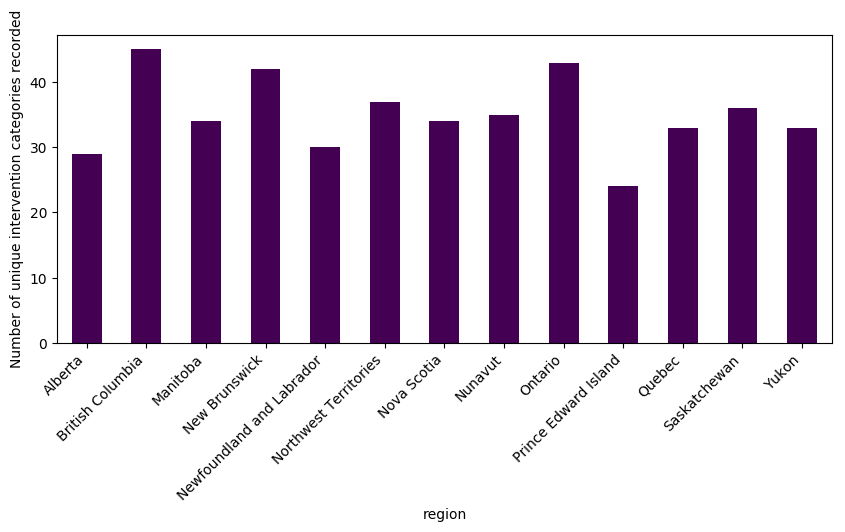

In [553]:
import matplotlib.ticker as ticker
provinces_df.dropna(subset=['region']).groupby(by=['region'])['intervention_category'].nunique().plot.bar(figsize=(10,4), cmap='viridis')
plt.ylabel('Number of unique intervention categories recorded')

#@ticker.FuncFormatter
#def major_formatter(x, pos):
#    return str(x).replace('(', '').replace('(', '')
#plt.gca().xaxis.set_major_formatter(major_formatter)
plt.xticks(rotation=45, ha='right')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

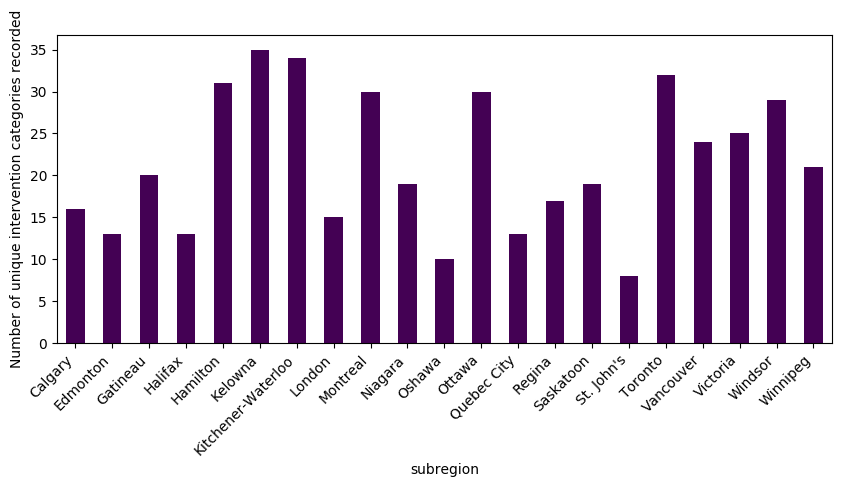

In [554]:
import matplotlib.ticker as ticker
subregions = full_df.dropna(subset=['subregion']).groupby(by=['subregion'])['intervention_category'].nunique()

subregions.plot.bar(figsize=(10,4), cmap='viridis')
plt.ylabel('Number of unique intervention categories recorded')

#@ticker.FuncFormatter
#def major_formatter(x, pos):
#    return str(x).replace('(', '').replace('(', '')
#plt.gca().xaxis.set_major_formatter(major_formatter)
plt.xticks(rotation=45, ha='right')


Text(0.5,0,'Number of unique Oxford interventions recorded')

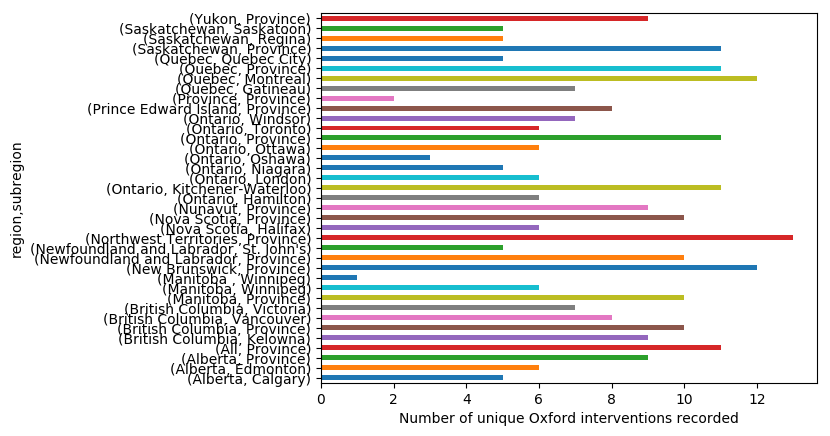

In [555]:
full_df.fillna('Province').groupby(by=['region', 'subregion'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford interventions recorded')


Text(0,0.5,'Unique Intervention Categories Recorded')

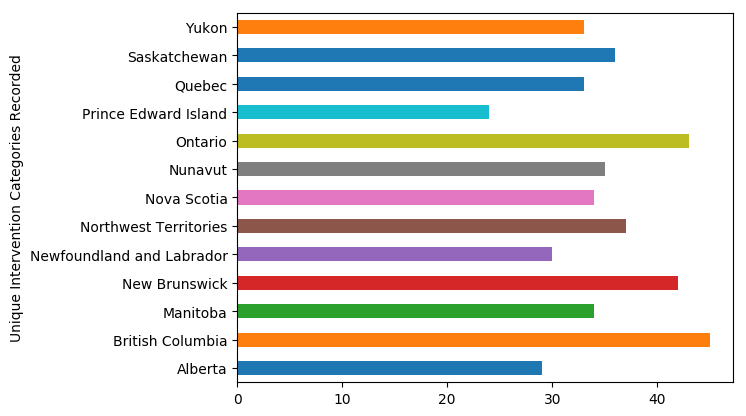

In [556]:
provinces_df.groupby(by='region')['intervention_category'].nunique().plot.barh()
plt.ylabel('Unique Intervention Categories Recorded')

Text(0.5,0,'Number of unique interventions recorded')

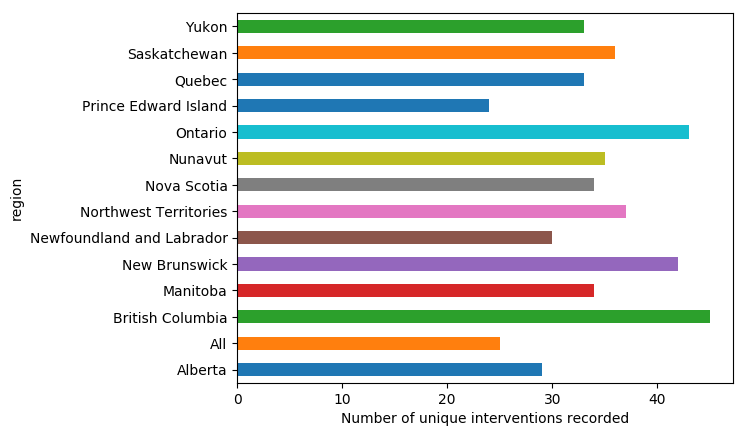

In [557]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['intervention_category'].nunique().plot.barh()
plt.xlabel('Number of unique interventions recorded')


Text(0.5,0,'Number of unique Oxford response measures recorded')

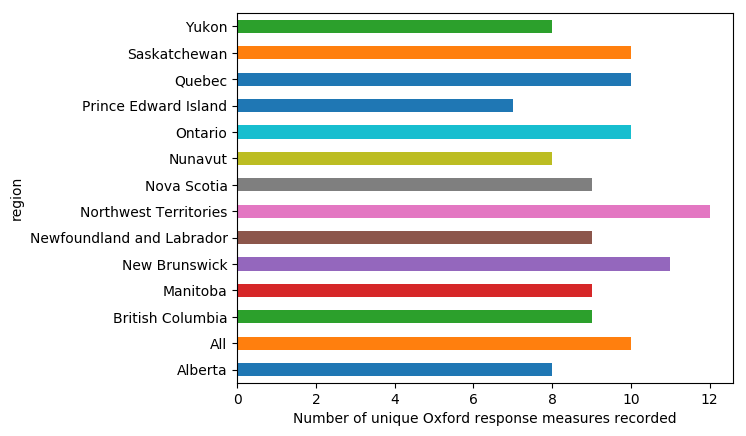

In [558]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford response measures recorded')


Text(0.5,0,'Oxford Fiscal Measure (CAD) recorded')

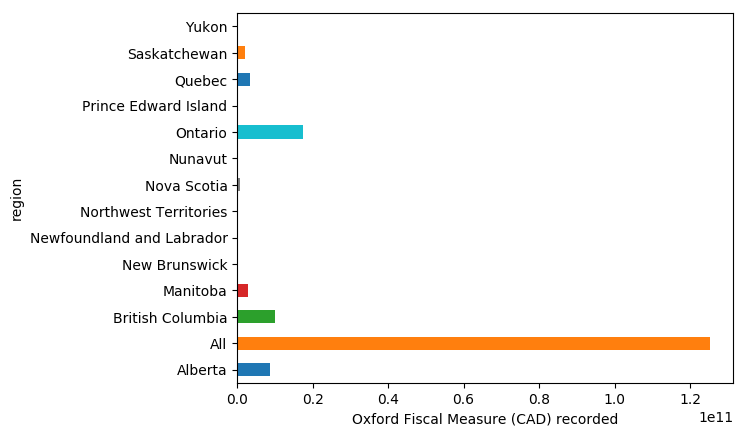

In [559]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_fiscal_measure_cad'].sum().plot.barh()
plt.xlabel('Oxford Fiscal Measure (CAD) recorded')


In [560]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_fiscal_measure_cad'].sum()

region
Alberta                      8.634300e+09
All                          1.252240e+11
British Columbia             9.875500e+09
Manitoba                     2.749047e+09
New Brunswick                1.845016e+08
Newfoundland and Labrador    3.205000e+08
Northwest Territories        1.800650e+08
Nova Scotia                  6.365100e+08
Nunavut                      5.712000e+07
Ontario                      1.738090e+10
Prince Edward Island         5.106000e+07
Quebec                       3.396900e+09
Saskatchewan                 2.169950e+09
Yukon                        2.170000e+07
Name: oxford_fiscal_measure_cad, dtype: float64

Text(0,0.5,'$ / person')

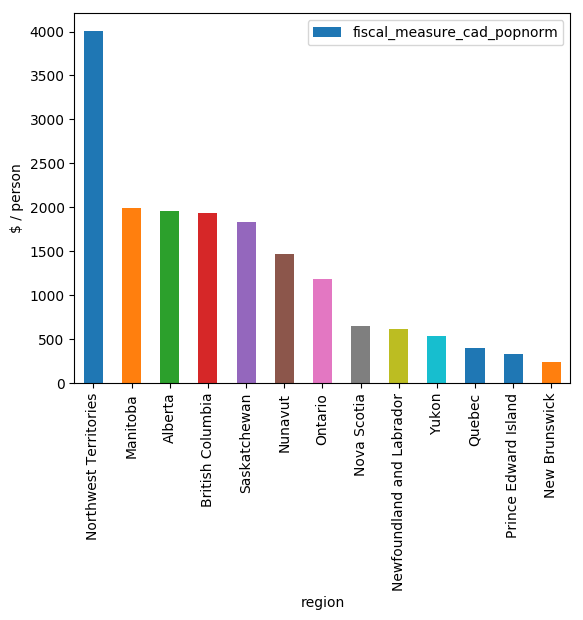

In [561]:
df = pd.DataFrame(provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum())
df['region'] = df.index
df = df.merge(population_df, on='region', how='left')
df['fiscal_measure_cad_popnorm'] = df['oxford_fiscal_measure_cad'] /  df['population_q1_2020']
df = df.sort_values(by='fiscal_measure_cad_popnorm', ascending=False)
df.plot.bar(x='region', y='fiscal_measure_cad_popnorm')
plt.ylabel("$ / person")

Text(0,0.5,'fiscal measures (CAD)')

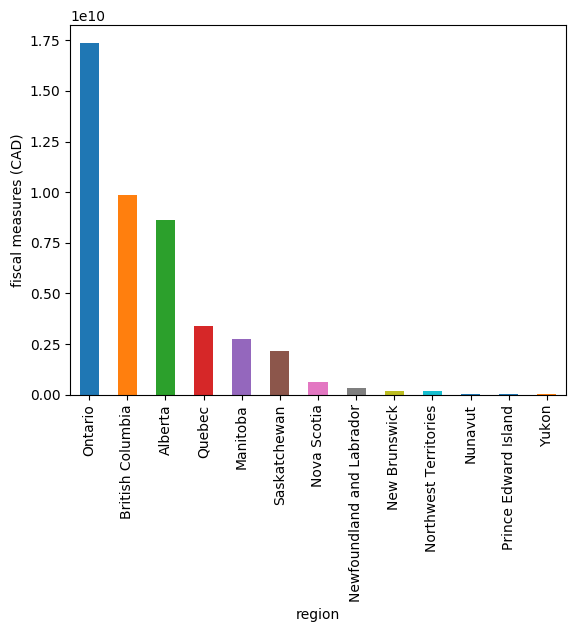

In [562]:
provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('fiscal measures (CAD)')

# Comparing Provincial and Municipal Interventions of the Same Type

ValueError: NaTType does not support toordinal

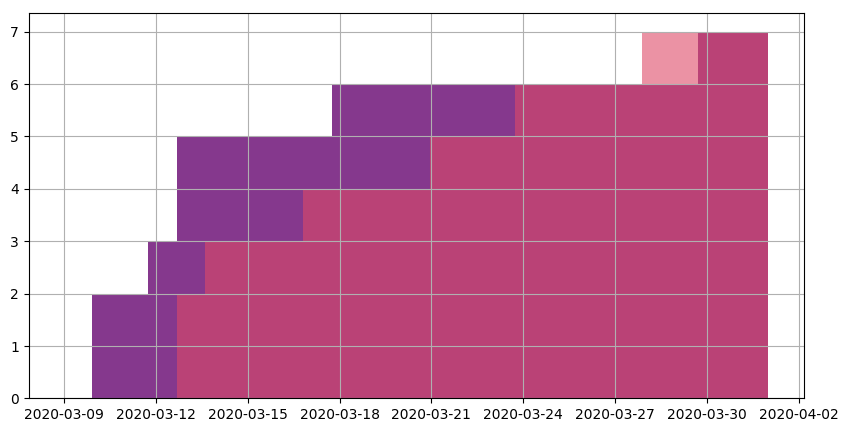

In [563]:
from matplotlib.dates import MO
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5)

ont_df = full_df[full_df['region'] == 'Ontario']

cmap = mpl.cm.get_cmap('magma')

soc = ont_df[ont_df['intervention_category'] == 'Social Distancing Announcement']
#rec = ont_df[ont_df['intervention_category'] == 'Recreational / Entertainment Facility Closure']
pem = ont_df[ont_df['intervention_category'] == 'Public event/ meeting cancellation or postponement']
#park = ont_df[ont_df['intervention_category'] == 'Public park closure']

start = datetime(2020, 3, 9)
end = datetime(2020, 4, 1) 
drange=(start, end)

pem.groupby('subregion').min()['start_date'].hist(bins=50, range=drange, color=cmap(0.35),  alpha=0.9, cumulative=True, label='Public event cancellation')
#rec.groupby('subregion').min()['start_date'].hist(bins=30, color=cmap(0.8), alpha=0.5, cumulative=True, label='Recreational / Entertainment Facility Closure')
soc.groupby('subregion').min()['start_date'].hist(bins=50, range=drange, color=cmap(0.6), alpha=0.6, cumulative=True, label='Social distancing announcements')
#park.groupby('subregion').min()['start_date'].hist(color='red', alpha=0.5, label='Public park closure')

a = soc[soc['subregion'].isna()]
soc_ont = a[a['intervention_category'] == 'Social Distancing Announcement']
soc_ont_date = soc_ont['start_date'].min()

#a = rec[rec['subregion'].isna()]
rec_ont = a[a['intervention_category'] == 'Recreational / Entertainment Facility Closure']
rec_ont_date = rec_ont['start_date'].min()

plt.axvline(x=rec_ont_date, label='First provincial public event cancellation', color=cmap(0.25), linewidth=2)
plt.axvline(x=soc_ont_date, label='First provincial social distancing announcement', color=cmap(0.65), linewidth=2)

plt.xticks(rotation=45, ha='right')
plt.legend(loc="lower right")
plt.title('Municipality interventions over time in Ontario compared with Provincial interventions')

plt.xlabel('Date')
plt.ylabel('Municipalities with intervention')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO)))
month_format = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(month_format)


## Heatmap of cumulative municipal top intervention categories

In [ ]:
# Thanks to matplotlib documentation for this

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
top_interventions = full_df.groupby(by='subregion')['intervention_category'].value_counts() \
    .groupby(by='intervention_category') \
    .count() \
    .sort_values(ascending=False)[:10] \
    
top_interventions

In [ ]:
cma_population= pd.DataFrame([['Toronto', 5429524],
                ["Montreal", 3519595],
                ["Vancouver", 2264823],
                ["Calgary", 1237656],
                ["Edmonton", 1062643],
                ["Ottawa", 989657],
                ["Gatineau", 989657],
                ["Winnipeg", 711925],
                ["Quebec City", 705103],
                ["Hamilton", 693645],
                ["Kitchener-Waterloo", 535154],
                ["London", 383437],
                ["Victoria", 335696],
                ["Halifax", 316701],
                ["Oshawa", 308875],
                ["Windsor", 287069],
                ["Saskatoon", 245181],
                ["Niagara", 229246],
                ["Regina", 214631],
                ["St. John's", 178427],
                ["Kelowna", 151957]], columns=['subregion', 'population'])
# Population numbers from Canadian Census 2016

In [ ]:
filtered_df = full_df[full_df['intervention_category'].isin(top_interventions.index.values)]
#filtered_df = filtered_df.groupby(by=['subregion', 'start_date']).nunique()['intervention_category']
filtered_df = filtered_df.merge(cma_population, on='subregion')
filtered_df = filtered_df.sort_values(by='population', ascending=False)
soc_count = filtered_df.groupby(by=['subregion', 'intervention_category'], sort=False).min()['start_date']
#soc_count = soc_count.merge(cma_population, on='subregion')

xticks = pd.date_range(start='03-08-2020', end='04-19-2020', freq='W')


col = ['subregion', *xticks.date]
cma_df = pd.DataFrame()

for subregion in soc_count.index.get_level_values(0).unique():
    dates = soc_count.loc[[subregion]].reset_index()
    empty_row = [subregion]
    for week_end in xticks.values:
        count = dates[dates['start_date'] < week_end]['intervention_category'].count()
        empty_row.append(count)
    cma_df = cma_df.append([empty_row])
    
cma_df.columns = col
cma_df = cma_df.set_index('subregion')

In [ ]:
#fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(10,6))
fig, ax = plt.subplots(figsize=(10,8))

nice_date = [x.strftime('%B %d') for x in cma_df.columns.values]

im, cbar = heatmap(cma_df.values, cma_df.index.values, nice_date, ax=ax,
                   cmap="magma_r", cbarlabel="# of distinct intervention categories")
texts = annotate_heatmap(im, valfmt="{x:.0f}")

fig.tight_layout()
plt.savefig('doc/img/fig5.png', dpi=300)

# Mobility comparison

In [ ]:
ox = full_df['oxford_government_response_category'].unique()

In [ ]:
ox[2]

In [ ]:
gb = provinces_df.groupby(by='region')
for gb_name, g in gb:
    for intervention in ox:
        rows = g[g['oxford_government_response_category'] == intervention]
        if ox[2] in rows['oxford_government_response_category']: # public events
            print(rows['oxford_closure_code'])

In [ ]:
g['oxford_government_response_category'].mode()